<a href="https://colab.research.google.com/github/EricAlcarazdelPico/deep-learning-with-python-personal-workflow/blob/main/binary_classification_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classifying movie reviews: The IMDB dataset


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
# load data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [3]:
train_data.shape

(25000,)

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
train_labels[0]

1

In [6]:
train_labels.shape

(25000,)

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [10]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [11]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Shuffling data and setting aside a 10000 size validation set**

In [12]:
index_shuff = np.arange(len(x_train))
np.random.shuffle(index_shuff)

x_train = x_train[index_shuff] #creates new axis of length 1
x_train = np.squeeze(x_train)
y_train = y_train[index_shuff]
y_train = np.squeeze(y_train)

validation_size = 10000
x_train_shuff = x_train[validation_size:]
y_train_suff = y_train[validation_size:]
x_valid_shuff = x_train[:validation_size]
y_valid_shuff = y_train[:validation_size]

**Training your model**

In [13]:
history = model.fit(x_train_shuff,
                    y_train_suff,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid_shuff, y_valid_shuff))

Epoch 1/20
30/30 [==============================] - 5s 46ms/step - loss: 0.5015 - accuracy: 0.7743 - val_loss: 0.3652 - val_accuracy: 0.8765
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2876 - accuracy: 0.9071 - val_loss: 0.2987 - val_accuracy: 0.8887
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2109 - accuracy: 0.9319 - val_loss: 0.2788 - val_accuracy: 0.8934
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1665 - accuracy: 0.9450 - val_loss: 0.2977 - val_accuracy: 0.8842
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1367 - accuracy: 0.9561 - val_loss: 0.2892 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1105 - accuracy: 0.9672 - val_loss: 0.3101 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0906 - accuracy: 0.9728 - val_loss: 0.3269 - val_accuracy: 0.8851
Epoch 8/20
30

**Plotting the training and validation loss**

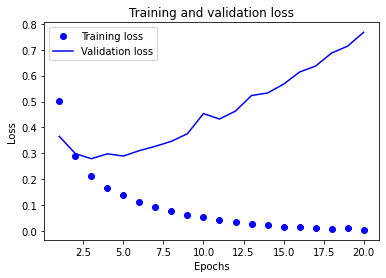

In [14]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

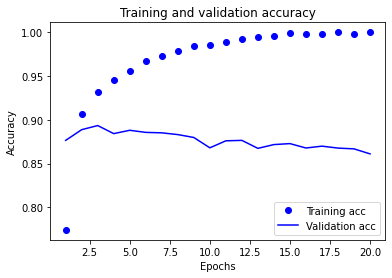

In [15]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 2s 15ms/step - loss: 0.4341 - accuracy: 0.8280
Epoch 2/3
49/49 [==============================] - 1s 15ms/step - loss: 0.2536 - accuracy: 0.9097
Epoch 3/3
782/782 [==============================] - 3s 4ms/step - loss: 0.3173 - accuracy: 0.8709


In [17]:
results

[0.3172573447227478, 0.8709200024604797]

### Generate predictions on test data

In [21]:
model.predict(x_test)

array([[0.19625439],
       [0.9994393 ],
       [0.6760058 ],
       ...,
       [0.09103772],
       [0.06771002],
       [0.33928055]], dtype=float32)

**Decoding reviews back to text**

In [22]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]) # -3 for special charecters

1654784/1641221 [==============================] - 0s 0us/step


In [25]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [26]:
train_labels[0]

1